In [12]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
color = sns.color_palette()

In [13]:
# train and test split
df = pd.read_csv("../data/train_2016_v2.csv", parse_dates=["transactiondate"])
df_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [14]:
print(df.shape)
print(df_train.shape)
print(df_test.shape)

(90275, 3)
(72220, 3)
(18055, 3)


# Analyze target variable - logerror

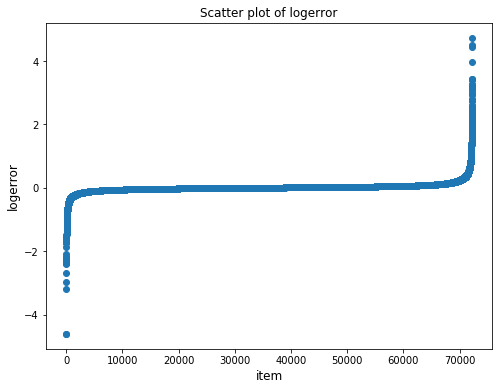

In [15]:
# scatter plot
plt.figure(figsize=(8,6))
plt.scatter(range(df_train.shape[0]), np.sort(df_train['logerror'].values))
plt.xlabel('item', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.title('Scatter plot of logerror')
plt.show()

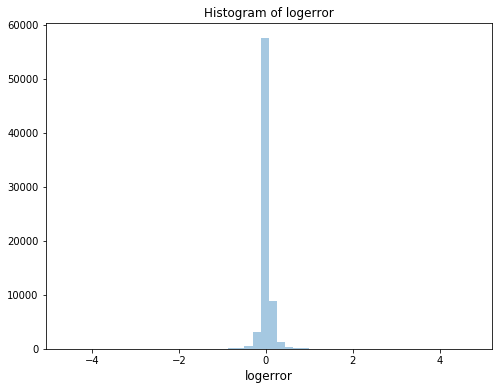

In [16]:
# histogram plot
plt.figure(figsize=(8, 6))
sns.distplot(df_train['logerror'].values, bins=50, kde=False)
plt.xlabel('logerror', fontsize=12)
plt.title('Histogram of logerror')
plt.show()

In [55]:
# get the 95% and 5% value and count outliers
ub = np.percentile(df_train.logerror.values, 95)
lb = np.percentile(df_train.logerror.values, 5)
high = df_train[(df_train['logerror'] > ub)]
low = df_train[df_train['logerror'] < lb]
print("upper", ub)
print("lower", lb)
print(high.shape, low.shape)

upper 0.1647
lower -0.1278
(3607, 4) (3594, 4)


In [56]:
# set 95% and 5% as outliers and set logerror as ub or lb
# df_train_remove_outlier = df_train
df_train['logerror'][df_train['logerror'] > ub] = ub
df_train['logerror'][df_train['logerror'] < lb] = lb

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Anaconda\lib\site-packages\pandas\core\generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
E:\Anaco

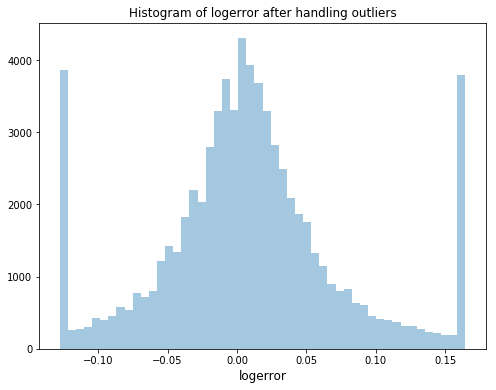

In [57]:
# histogram plot after handling outliers
plt.figure(figsize=(8, 6))
sns.distplot(df_train['logerror'].values, bins=50, kde=False)
plt.xlabel('logerror', fontsize=12)
plt.title('Histogram of logerror after handling outliers')
plt.show()

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


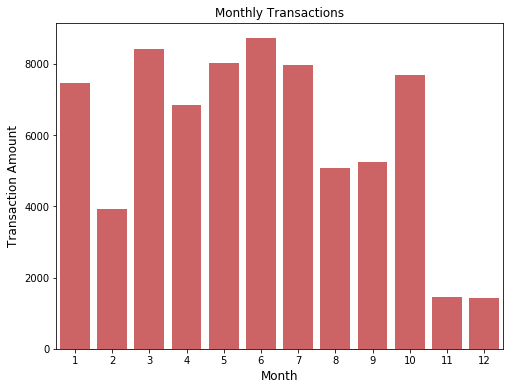

In [58]:
# Transactions
df_train['transaction_month'] = df_train['transactiondate'].dt.month
monthly_transaction = df_train['transaction_month'].value_counts()

plt.figure(figsize=(8,6))
sns.barplot(df_train['transaction_month'].unique(), monthly_transaction.values, alpha=0.8, color=color[3])
# plt.xticks(rotation='vertical')
plt.xlabel('Month', fontsize=12)
plt.ylabel('Transaction Amount', fontsize=12)
plt.title('Monthly Transactions')
plt.show()

In [21]:
# Parcel ID
(df_train['parcelid'].value_counts().reset_index())['parcelid'].value_counts()

1    72063
2       77
3        1
Name: parcelid, dtype: int64

# Merge transaction df and property feature df

In [23]:
# Property file (w/ all features)
df_property = pd.read_csv("../data/properties_2016.csv")
df_property.shape

E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(2985217, 58)

In [24]:
# Merge train and property file
train_data = pd.merge(df_train, df_property, on='parcelid', how='left')
train_data.shape

(72220, 61)

# Missing Values

In [26]:
# missing values
missing_df = train_data.isnull().sum(axis=0).reset_index()
missing_df.columns = ['covariate', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count'] / train_data.shape[0]
missing_df = missing_df.sort_values(['missing_ratio'],ascending=False)
missing_df[missing_df['missing_ratio']>0.9]

,covariate,missing_count,missing_ratio
9,buildingclasstypeid,72206,0.999806
16,finishedsquarefeet13,72194,0.999640
6,basementsqft,72185,0.999515
44,storytypeid,72185,0.999515
49,yardbuildingsqft26,72147,0.998989
52,fireplaceflag,72043,0.997549
5,architecturalstyletypeid,72011,0.997106
46,typeconstructiontypeid,71981,0.996691
19,finishedsquarefeet6,71889,0.995417
12,decktypeid,71691,0.992675


In [27]:
missing_df[missing_df['missing_ratio']>0.9].shape

(20, 3)

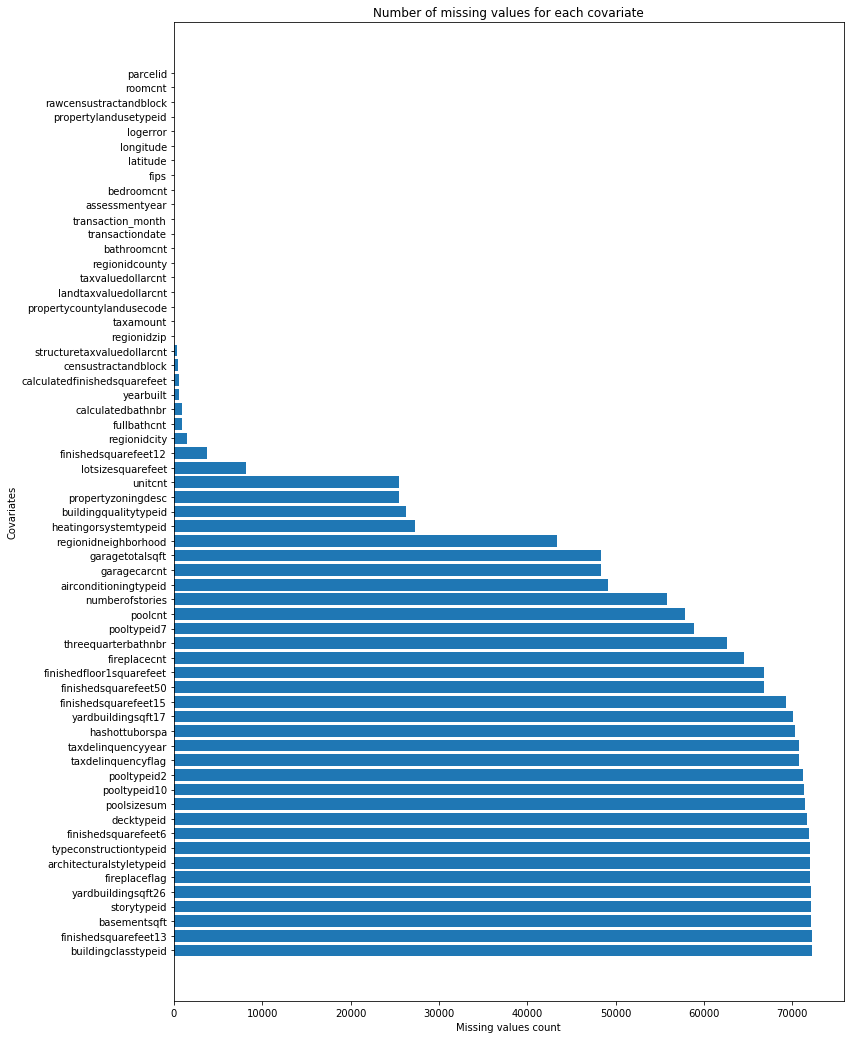

In [28]:
width = 0.9
fig, ax = plt.subplots(figsize=(12,18))
rects = ax.barh(np.arange(missing_df.shape[0]), missing_df.missing_count.values)

ax.set_xlabel("Missing values count")
ax.set_yticks(np.arange(missing_df.shape[0]))
ax.set_yticklabels(missing_df.covariate.values, rotation='horizontal')
ax.set_ylabel("Covariates")
ax.set_title("Number of missing values for each covariate")
plt.show()

In [29]:
# drop the ones with almost all null values
drop_columns = missing_df[missing_df['missing_ratio'] > 0.9].covariate
train_data = train_data.drop(columns=drop_columns)

In [30]:
# drop propertycountylandusecode, propertyzoningdesc, regionidcity, regionidneighborhood, regionidzip
drop_columns = ['propertycountylandusecode', 'propertyzoningdesc', 'regionidcity', 'regionidneighborhood', 'regionidzip']
train_data = train_data.drop(columns=drop_columns)

In [31]:
# Check data type and convert
dtype_df = train_data.dtypes.reset_index()
dtype_df.columns = ["Column", "Column Type"]
dtype_df

,Column,Column Type
0,parcelid,int64
1,logerror,float64
2,transactiondate,datetime64[ns]
3,transaction_month,int64
4,airconditioningtypeid,float64
5,bathroomcnt,float64
6,bedroomcnt,float64
7,buildingqualitytypeid,float64
8,calculatedbathnbr,float64
9,calculatedfinishedsquarefeet,float64


In [32]:
columns_to_convert = ['airconditioningtypeid', 'buildingqualitytypeid', 'heatingorsystemtypeid','pooltypeid7',
                     'propertylandusetypeid', 'regionidcounty']
for col in columns_to_convert:
    train_data[col] = train_data[col].astype(object)

In [33]:
# impute mean to missing values for numerical columns
numeric_column = [col for col in train_data.columns if train_data[col].dtype=='float64']
mean_val_numeric = train_data[numeric_column].mean(axis=0)

for i, col in enumerate(numeric_column):
    train_data[col].fillna(value=mean_val_numeric[i], inplace=True)

In [49]:
print(len(numeric_column))

27


In [35]:
# impute majority value to missing values for categorical columns
cate_column = [col for col in train_data.columns if train_data[col].dtype=='object']
for i, col in enumerate(cate_column):
    frequentist = train_data.groupby([col]).count().sort_values(['parcelid'], 
                                                                  ascending=False).reset_index().iloc[0][col]

    train_data.fillna(frequentist, inplace=True)
    print(col, len(train[col].unique()))

train_data[cate_column] = train_data[cate_column].astype(object)

In [50]:
print(len(cate_column))

0


# Variable transform

In [36]:
# convert categorical variable to dummy variables
train_data = pd.get_dummies(train_data)

In [37]:
# covariate with only one value 
one_value_columns = []
for col in train_data.columns: 
    if len(train_data[col].unique()) == 1:
        one_value_columns.append(col)

# drop
train_data = train_data.drop(columns=one_value_columns)

In [38]:
dtype_df = train_data.dtypes.reset_index()
dtype_df.columns = ["Column", "Column Type"]
dtype_df.groupby("Column Type").aggregate('count').reset_index()

,Column Type,Column
0,int64,2
1,float64,30
2,datetime64[ns],1


# Correlation study on numerical variables

In [39]:
# Correlation coefficient of each of numeric covariates with logerror
x_numeric = [col for col in train_data.columns if col not in ['logerror'] if train_data[col].dtype=='float64']

labels = []
values = []
for col in x_numeric:
    labels.append(col)
    values.append(np.corrcoef(train_data[col].values, train_data.logerror.values)[0,1])
corr_df = pd.DataFrame({'col_labels':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')

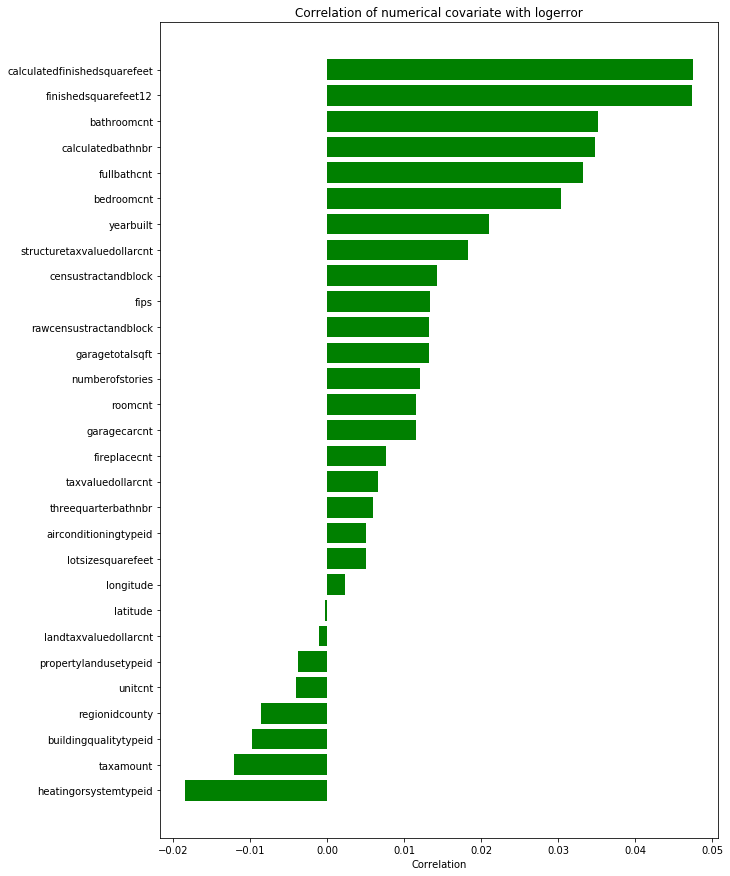

In [40]:
width = 0.9
fig, ax = plt.subplots(figsize=(10, 15))
rects = ax.barh(np.arange(len(labels)), np.array(corr_df.corr_values.values), color='green')
ax.set_xlabel("Correlation")
ax.set_title("Correlation of numerical covariate with logerror")
ax.set_yticks(np.arange(len(labels)))
ax.set_yticklabels(corr_df.col_labels.values, rotation='horizontal')
plt.show()
# we found low correlation in general

In [41]:
# correlation between covariates which have high correlation w/ logerrir
corr_df_sel = corr_df[(corr_df['corr_values'] > 0.02) | (corr_df['corr_values'] < -0.01)]
corr_df_sel

,col_labels,corr_values
12,heatingorsystemtypeid,-0.018455
27,taxamount,-0.012075
22,yearbuilt,0.021005
2,bedroomcnt,0.030306
9,fullbathcnt,0.033137
4,calculatedbathnbr,0.034741
1,bathroomcnt,0.035084
6,finishedsquarefeet12,0.047338
5,calculatedfinishedsquarefeet,0.047423


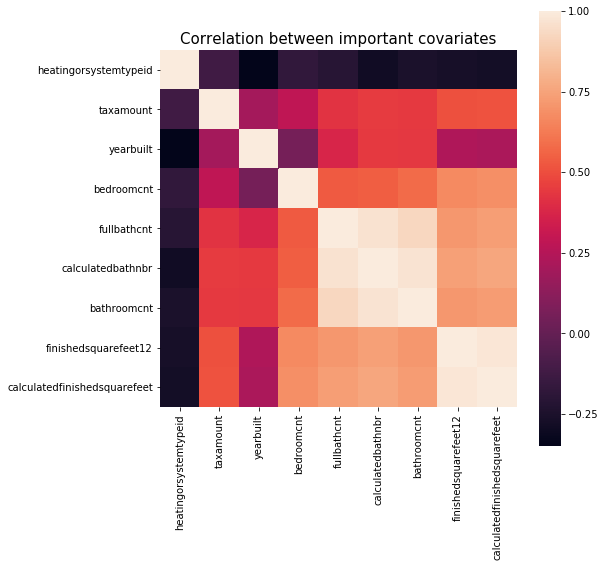

In [42]:
cols_to_include = corr_df_sel.col_labels.tolist()

temp_data = train_data[cols_to_include]
corrmat = temp_data.corr(method='spearman')
f, ax = plt.subplots(figsize=(8, 8))

# Draw the heatmap using seaborn
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Correlation between important covariates", fontsize=15)
plt.show()

# some highly correlated covariates
# bedroomcnt, fullbathcn, calculatedbathnbr, bathroomcnt, claculatedfinishedsquarefeet, finishedsquarefeet12, taxamount

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
E:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 576x576 with 0 Axes>

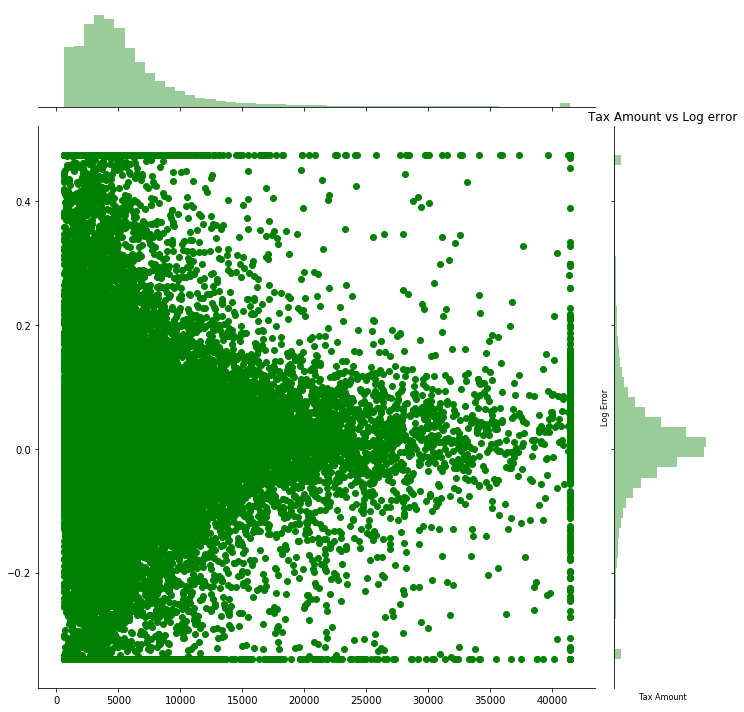

In [43]:
# highly correlated covariates
# claculatedfinishedsquarefeet, finishedsquarefeet12, taxamount
col = "taxamount"
ulimit = np.percentile(train_data[col].values, 99.5)
llimit = np.percentile(train_data[col].values, 0.5)
train_data[col][train_data[col] > ulimit] = ulimit
train_data[col][train_data[col] < llimit] = llimit

plt.figure(figsize=(8, 8))
sns.jointplot(x=train_data['taxamount'].values, y=train_data['logerror'].values, size=10, color='g')
plt.ylabel('Log Error', fontsize=8)
plt.xlabel('Tax Amount', fontsize=8)
plt.title("Tax Amount vs Log error", fontsize=12)
plt.show()

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
E:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 576x576 with 0 Axes>

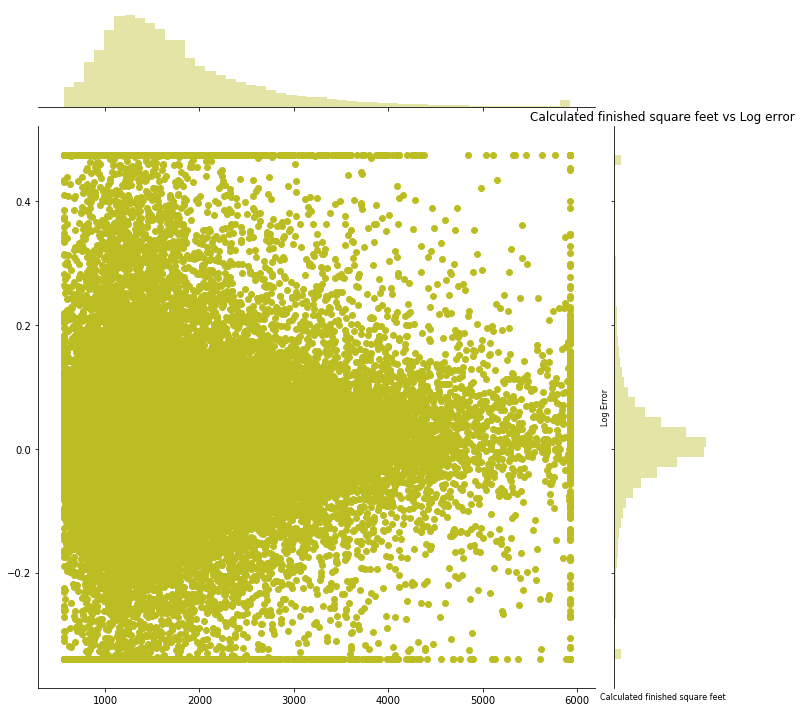

In [44]:
col = "calculatedfinishedsquarefeet"
ulimit = np.percentile(train_data[col].values, 99.5)
llimit = np.percentile(train_data[col].values, 0.5)
train_data[col][train_data[col] > ulimit] = ulimit
train_data[col][train_data[col] < llimit] = llimit

plt.figure(figsize=(8,8))
sns.jointplot(x=train_data.calculatedfinishedsquarefeet.values, y=train_data.logerror.values, size=10, color=color[8])
plt.ylabel('Log Error', fontsize=8)
plt.xlabel('Calculated finished square feet', fontsize=8)
plt.title("Calculated finished square feet vs Log error", fontsize=12)
plt.show()

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
E:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
E:\Anaconda\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 576x576 with 0 Axes>

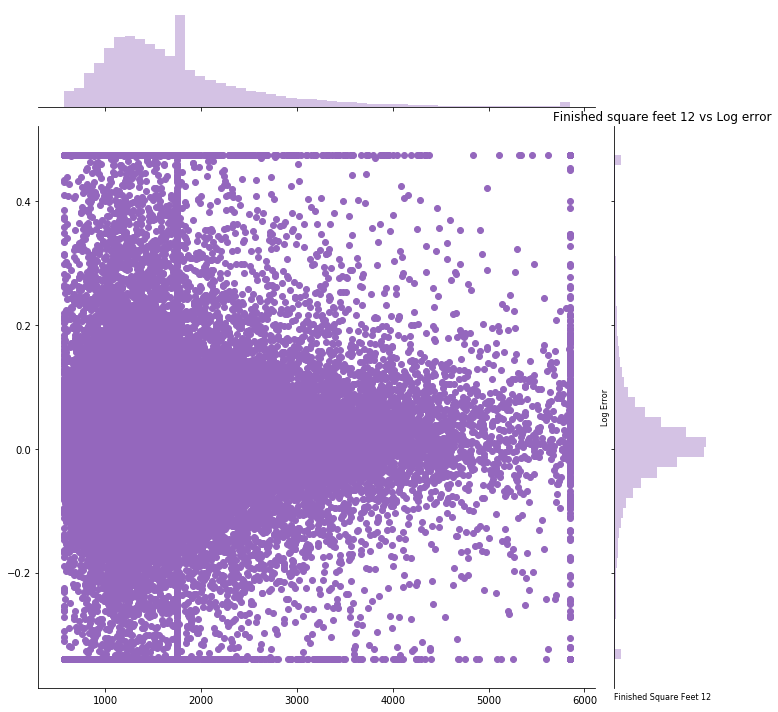

In [45]:
col = "finishedsquarefeet12"
ulimit = np.percentile(train_data[col].values, 99.5)
llimit = np.percentile(train_data[col].values, 0.5)
train_data[col][train_data[col]>ulimit] = ulimit
train_data[col][train_data[col]<llimit] = llimit

plt.figure(figsize=(8,8))
sns.jointplot(x=train_data.finishedsquarefeet12.values, y=train_data.logerror.values, size=10, color=color[4])
plt.ylabel('Log Error', fontsize=8)
plt.xlabel('Finished Square Feet 12', fontsize=8)
plt.title("Finished square feet 12 vs Log error", fontsize=12)
plt.show()

# Time Pattern

In [46]:
def exploreCatePattern(df, x, y):
    plt.figure(figsize=(8,6))
    plt.scatter(df[x], df[y], s=0.1, alpha=0.5)
    plt.ylabel(y, fontsize=12)
    plt.xlabel(x, fontsize=12)
    title = f'{x} vs {y}'
    plt.title(title, fontsize=15)
    plt.show()

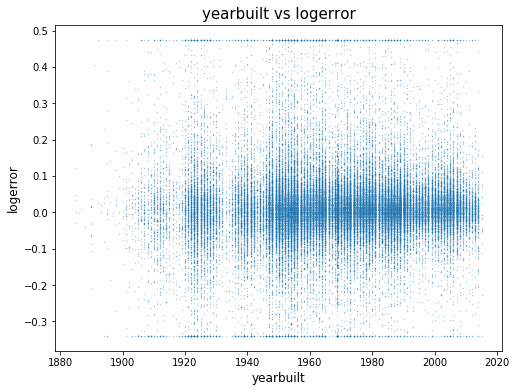

In [47]:
# year built
exploreCatePattern(train_data, 'yearbuilt', 'logerror')

### Save Data

In [48]:
train_data.to_csv("train.csv")